<a href="https://colab.research.google.com/github/subbu27iitb/Deep-Learning/blob/main/TF%2BKerasII_Func_API_self.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

FUNCTIONAL API ILLUSTRATION using cifar10 dataset

Google -keras-Functional API and ctrl+F..toyResNet 

  https://keras.io/guides/functional_api/

In [14]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Input,Conv2D,MaxPooling2D,Dropout,Dense 
from keras.layers import GlobalAveragePooling2D,add
from keras.models import Model, Sequential

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [10]:
input_shape=(32,32,3)

Model Definition

In [19]:
inputs=keras.Input(shape=(input_shape))
x=Conv2D(32,3,activation='relu')(inputs)
x=Conv2D(64,3,activation='relu')(x)
block1_op=MaxPooling2D(3)(x)
#print(block1_op.shape)

x=Conv2D(64,3,activation='relu', padding='same')(block1_op)
x=Conv2D(64,3,activation='relu', padding='same')(x)
#print(x.shape)
block2_op=add([x,block1_op])#padding shd be 'same' to have same size of x and block1_op

x=Conv2D(64,3,activation='relu', padding='same')(block2_op)
x=Conv2D(64,3,activation='relu', padding='same')(x)
block3_op=add([x,block2_op])

x=Conv2D(64,3,activation='relu')(block3_op)
x=GlobalAveragePooling2D()(x)
x=Dense(256, activation='relu')(x)
x=Dropout(0.5)(x)
outputs=Dense(10)(x)

model_API= Model(inputs,outputs)
model_API.summary()


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_11 (InputLayer)          [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d_41 (Conv2D)             (None, 30, 30, 32)   896         ['input_11[0][0]']               
                                                                                                  
 conv2d_42 (Conv2D)             (None, 28, 28, 64)   18496       ['conv2d_41[0][0]']              
                                                                                                  
 max_pooling2d_9 (MaxPooling2D)  (None, 9, 9, 64)    0           ['conv2d_42[0][0]']              
                                                                                            

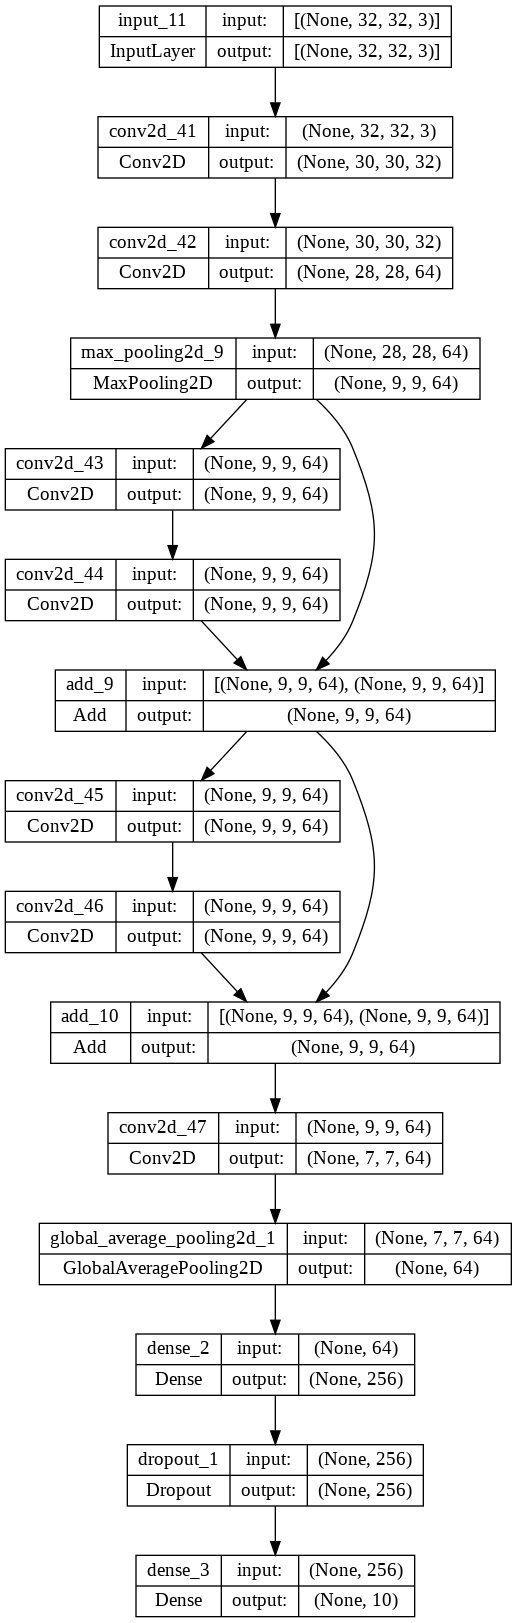

In [21]:
keras.utils.plot_model(model_API,show_shapes=True)

1. Load cifar10 data
2. scale x_train & x_test; 
3. convert y_train & y_test to categorical if required.
4. Compile & Fit model

In [54]:
(x_train,y_train),(x_test,y_test)= keras.datasets.cifar10.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
x_train=x_train.astype('float')/255.0
x_test=x_test.astype('float')/255.0

#y_train=keras.utils.to_categorical(y_train,10)
#y_test=keras.utils.to_categorical(y_test,10)
class_names=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
print(np.unique(y_train))
print(y_train[10])

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)
[0 1 2 3 4 5 6 7 8 9]
[4]


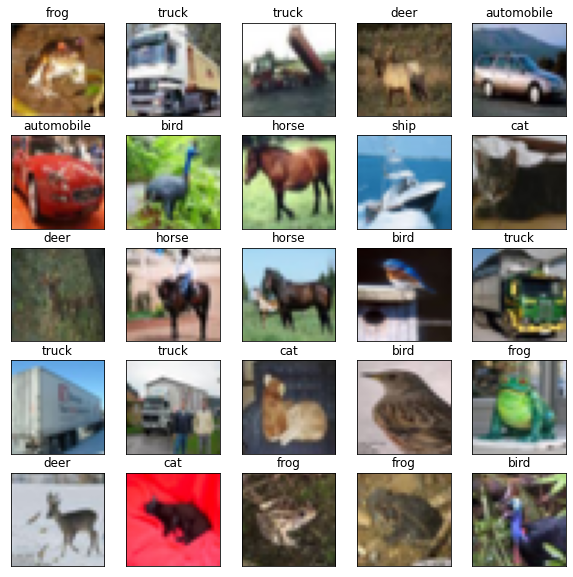

In [63]:
plt.figure(figsize=(10,10))
for i in range (25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[i])
  name=class_names[int(y_train[i])]
  plt.title(name)


In [64]:
#model_API.compile(optimizer='adam',
#                  loss=keras.losses.CategoricalCrossentropy(from_logits=True),
#                  metrics=['accuracy'])
model_API.compile(optimizer='adam',
                  loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

batch_size=128
epochs=15
model_API.fit(x_train,y_train,validation_split=0.35,batch_size=batch_size, epochs=epochs)

Epoch 1/15
254/254 [==============================] - 6s 20ms/step - loss: 0.0318 - accuracy: 0.9914 - val_loss: 1.5922 - val_accuracy: 0.8334
Epoch 2/15
254/254 [==============================] - 5s 18ms/step - loss: 0.0217 - accuracy: 0.9941 - val_loss: 1.7604 - val_accuracy: 0.8219
Epoch 3/15
254/254 [==============================] - 4s 18ms/step - loss: 0.0215 - accuracy: 0.9928 - val_loss: 1.6115 - val_accuracy: 0.8319
Epoch 4/15
254/254 [==============================] - 5s 18ms/step - loss: 0.0294 - accuracy: 0.9917 - val_loss: 1.5868 - val_accuracy: 0.8221
Epoch 5/15
254/254 [==============================] - 4s 18ms/step - loss: 0.0390 - accuracy: 0.9886 - val_loss: 1.5216 - val_accuracy: 0.8297
Epoch 6/15
254/254 [==============================] - 5s 20ms/step - loss: 0.0179 - accuracy: 0.9941 - val_loss: 1.6169 - val_accuracy: 0.8300
Epoch 7/15
254/254 [==============================] - 4s 18ms/step - loss: 0.0251 - accuracy: 0.9922 - val_loss: 1.6477 - val_accuracy: 0.8289

In [67]:
#result to match with the loss and accuracy of final epoch
score=model_API.evaluate(x_test,  y_test, verbose=2)
print("test_loss:", score[0])
print("test_accuracy:", score[1])

313/313 - 1s - loss: 2.3392 - accuracy: 0.7657 - 929ms/epoch - 3ms/step
test_loss: 2.3391573429107666
test_accuracy: 0.7656999826431274


Evaluation

(32, 32, 3)
(32, 32)
(32, 32, 3)
[6]


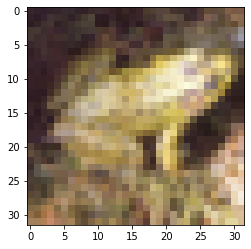

In [75]:
print(x_test[19].shape)
test_img=x_test[19]
test_img_new=test_img[:,:,0]
print(test_img_new.shape)
plt.imshow(test_img, cmap='gray')
print(x_test[19].shape)
print(y_test[19])

In [77]:
pred=np.argmax(model_API.predict(np.array([x_test[19]])))
#model_cnn.predict(np.array(x_test[999]))
pred_class=class_names[pred]
pred_class

1/1 [==============================] - 0s 16ms/step


'frog'

Confusion matrix

In [78]:
y_pred= np.argmax(model_API.predict(x_test),-1)
#confusion matrix
con_mat = tf.math.confusion_matrix(y_test, y_pred).numpy()
print(con_mat)

313/313 [==============================] - 1s 3ms/step
[[806   8  57  17  20   6   7   6  46  27]
 [ 18 844   5   6   2   8  18   6  20  73]
 [ 58   2 674  48  79  52  55  20   5   7]
 [ 19   5  71 605  66 140  46  26  12  10]
 [ 20   2  51  41 765  39  45  33   3   1]
 [  6   3  47 140  38 702  20  38   2   4]
 [  7   1  52  55  45  18 812   5   5   0]
 [ 18   1  32  42  69  54  15 747   4  18]
 [ 70  16  15  14   4   5   5   5 841  25]
 [ 28  45   7  19   3   4   4  11  18 861]]


In [79]:
con_mat_df= pd.DataFrame(con_mat,
                         index=class_names,
                         columns=class_names
    )
print(con_mat_df)

            airplane  automobile  bird  cat  deer  dog  frog  horse  ship  \
airplane         806           8    57   17    20    6     7      6    46   
automobile        18         844     5    6     2    8    18      6    20   
bird              58           2   674   48    79   52    55     20     5   
cat               19           5    71  605    66  140    46     26    12   
deer              20           2    51   41   765   39    45     33     3   
dog                6           3    47  140    38  702    20     38     2   
frog               7           1    52   55    45   18   812      5     5   
horse             18           1    32   42    69   54    15    747     4   
ship              70          16    15   14     4    5     5      5   841   
truck             28          45     7   19     3    4     4     11    18   

            truck  
airplane       27  
automobile     73  
bird            7  
cat            10  
deer            1  
dog             4  
frog        